In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from astropy.units import degree, arcmin, arcsec
from astropy.coordinates import SkyCoord
from astropy.table import Table

In [3]:
import gpao_obd as go

In [5]:
table_path = '../../gvprep/tabs/redstar_k9-10p5mag_grp16-18mag_gaia_final.ipac'
tb = Table.read(table_path, format='ascii.ipac')

In [6]:
tb.colnames

['designation',
 'ra_2000_hms',
 'dec_2000_dms',
 'ra_2000',
 'dec_2000',
 'H',
 'K',
 'Grp',
 'parallax',
 'pm',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'ra_2016',
 'dec_2016']

In [7]:
tb.rename_column('designation', 'name')
tb.rename_column('ra_2000', 'ra')
tb.rename_column('dec_2000', 'dec')

In [8]:
tb.add_index('name')

In [9]:
tb

name,ra_2000_hms,dec_2000_dms,ra,dec,H,K,Grp,parallax,pm,pmra,pmdec,radial_velocity,phot_g_mean_mag,ra_2016,dec_2016
,,,,,mag,mag,mag,mas,mas / yr,mas / yr,mas / yr,km / s,mag,deg,deg
str28,str12,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Gaia DR3 4853500790386957184,03:25:01.357,-38:58:35.848,51.25565226429274,-38.976624335244104,10.552,10.419,16.357912,5.965889948122083,54.3928,53.5694885058395,-9.427969456583403,0.0,18.617361,51.25595852336722,-38.97666623773083
Gaia DR3 6595778463264250752,22:44:44.467,-36:51:31.445,341.1852807051965,-36.858734615158745,10.311,10.214,16.130276,0.18017995202449796,14.852239,-1.3777123413807328,-14.788201557360592,0.0,18.20254,341.1852730523571,-36.85880034049924
Gaia DR3 4868157177305314048,04:40:51.784,-34:13:16.485,70.21576736660455,-34.221245742766975,10.581,10.476,16.575659,4.786612919190187,80.95032,2.6634631838405873,-80.9064882579322,0.0,20.298132,70.21578168274155,-34.221605327160056
Gaia DR3 4872185989773215616,04:21:38.651,-32:15:04.752,65.41104761949585,-32.25132012751359,9.994,9.637,17.43782,0.9765931033774395,6.625201,6.559773127651328,0.9288006876787901,0.0,19.233973,65.41108209272747,-32.251315999515214
Gaia DR3 4874730951169692544,04:54:58.656,-31:50:21.602,73.74439919949538,-31.839333794942558,10.353,10.135,16.576508,0.3044078727837364,3.3804996,2.198084883263627,2.5683069762282944,0.0,17.318808,73.74441069909832,-31.8393223802454
Gaia DR3 6557016486496710656,23:13:09.246,-31:21:51.902,348.28852621558116,-31.364417153347702,10.011,9.753,16.59869,14.283070096232063,132.2963,83.6917658736205,-102.45973734800651,0.0,18.70088,348.2889618340881,-31.36487253069409
Gaia DR3 5607855171083646720,06:59:33.685,-30:12:02.794,104.89035400343136,-30.20077607286266,9.378,9.166,17.437363,0.3165046818545441,5.437076,-5.111318216039092,1.8537045075535308,0.0,20.044426,104.89032771879492,-30.200767834178585
Gaia DR3 5607858022940533248,06:58:39.256,-30:10:32.311,104.66356607531483,-30.17564191675092,9.603,9.13,17.789015,-0.07057179478704464,2.9528809,1.6006282992990273,2.4814297968481576,0.0,19.23091,104.66357430434617,-30.1756308881743


## Create LGS_VIS template following LGS_VIS.py

In [10]:
from gpao_obd.generate_obd_from_tb import generate_lgs_vis_template
#target_names = ["[MDM2001] CFHT-BD-Tau 19"]
#target_names = tb['name']. # full all 
target_names = ["Gaia DR3 3011245246750174208"]

obdfiles = []
for obj_name in target_names:
    target = tb.loc[obj_name]
    obdfile =  generate_lgs_vis_template(target)
    obdfiles.append(obdfile)

template generated at LGS_VIS_055340-102403_16.4_10.1.obd


/Users/yixiancao/anaconda3/envs/gpao/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2625: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*args, out=...)


In [11]:
from gpao_obd.generate_finding_chart import generate_finding_charts

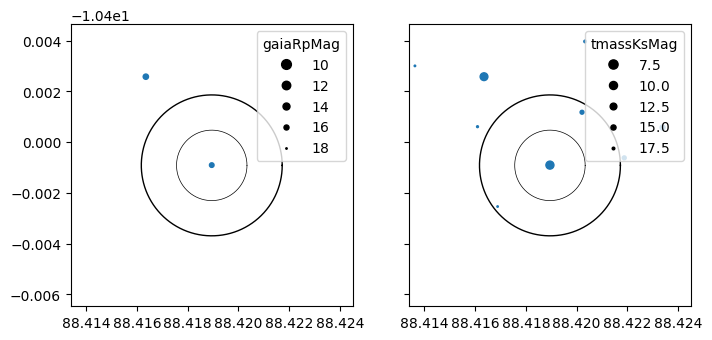

In [12]:
generate_finding_charts(obdfiles)